# 여행객 데이터 Cleansing

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rc('font', family='Malgun Gothic')  

# 음수 기호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

In [15]:
df = pd.read_csv('./data/tn_traveller_master_여행객 Master_E.csv')

print(df.shape) # (2560, 36)
df.head()

(2560, 36)


,TRAVELER_ID,RESIDENCE_SGG_CD,GENDER,AGE_GRP,EDU_NM,EDU_FNSH_SE,MARR_STTS,FAMILY_MEMB,JOB_NM,JOB_ETC,...,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_STATUS_YMD,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,TRAVEL_MOTIVE_3,TRAVEL_COMPANIONS_NUM
0,e004720,41,여,60,4,1.0,3,3,11,NaN,...,5,5,경기도,서울,2인 가족 여행,2023-07-16~2023-07-16,2,6.0,NaN,1
1,e000914,30,여,20,6,1.0,1,1,3,NaN,...,4,1,대전광역시,서울,나홀로 여행,2023-06-03~2023-06-03,1,7.0,10.0,0
2,e003564,41,여,30,7,1.0,2,4,2,NaN,...,1,7,경기도,경기,자녀 동반 여행,2023-06-24~2023-06-24,8,3.0,7.0,3
3,e000396,41,여,30,6,1.0,2,2,2,NaN,...,1,6,경기도,인천,2인 가족 여행,2023-05-20~2023-05-21,9,1.0,7.0,1
4,e001890,11,남,20,6,1.0,1,4,3,NaN,...,5,6,서울특별시,경기,2인 여행(가족 외),2023-06-04~2023-06-04,3,1.0,5.0,1


In [ ]:
df.info()
# EDU_FNSH_SE, JOB_ETC, HOUSE_INCOME, TRAVEL_MOTIVE_3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TRAVELER_ID                2560 non-null   object 
 1   RESIDENCE_SGG_CD           2560 non-null   int64  
 2   GENDER                     2560 non-null   object 
 3   AGE_GRP                    2560 non-null   int64  
 4   EDU_NM                     2560 non-null   int64  
 5   EDU_FNSH_SE                2558 non-null   float64
 6   MARR_STTS                  2560 non-null   int64  
 7   FAMILY_MEMB                2560 non-null   int64  
 8   JOB_NM                     2560 non-null   int64  
 9   JOB_ETC                    0 non-null      float64
 10  INCOME                     2560 non-null   int64  
 11  HOUSE_INCOME               2004 non-null   float64
 12  TRAVEL_TERM                2560 non-null   int64  
 13  TRAVEL_NUM                 2560 non-null   int64

### 결측치 처리

In [17]:
# JOB_ETC 삭제
if "JOB_ETC" in df.columns:
    df = df.drop(columns=["JOB_ETC"])

# EDU_FNSH_SE → 최빈값 대체
df["EDU_FNSH_SE"] = df["EDU_FNSH_SE"].fillna(df["EDU_FNSH_SE"].mode()[0])

# HOUSE_INCOME → 중앙값 대체
df["HOUSE_INCOME"] = df["HOUSE_INCOME"].fillna(df["HOUSE_INCOME"].median())

# TRAVEL_MOTIVE_2,3 → 0 대체
for col in ["TRAVEL_MOTIVE_2", "TRAVEL_MOTIVE_3"]:
    df[col] = df[col].fillna(0)

### 이상치 처리

In [18]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower) & (dataframe[column] <= upper)]

for col in numeric_cols:
    df = remove_outliers_iqr(df, col)

### 시각화

C:\Users\Playdata\AppData\Local\Temp\ipykernel_3028\1178032274.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accompany_counts.index,


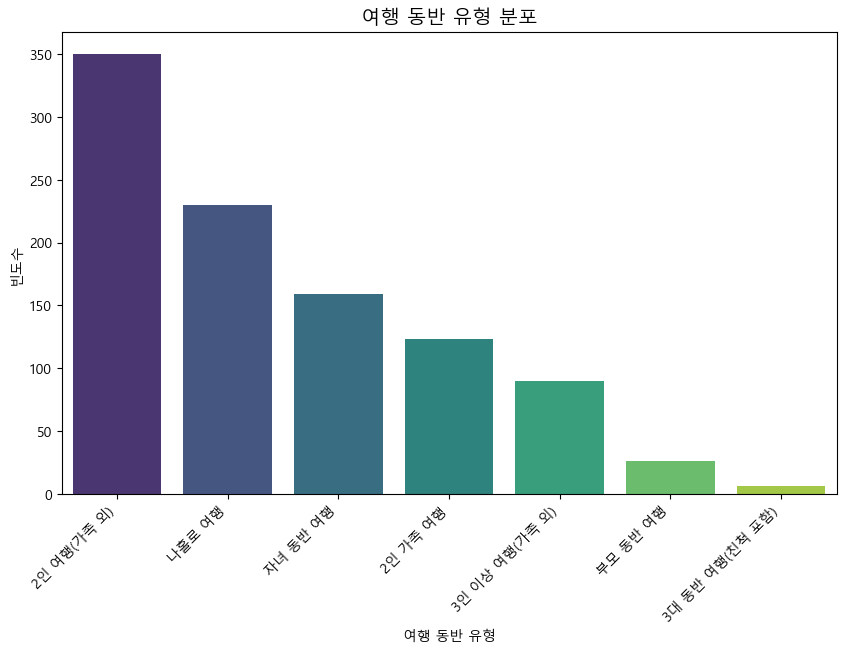

In [ ]:
# 동행자별
accompany_counts = df["TRAVEL_STATUS_ACCOMPANY"].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=accompany_counts.index,
            y=accompany_counts.values,
            palette="viridis")

plt.title("여행 동반 유형 분포", fontsize=14)
plt.xlabel("여행 동반 유형")
plt.ylabel("빈도수")
plt.xticks(rotation=45, ha="right")
plt.show()

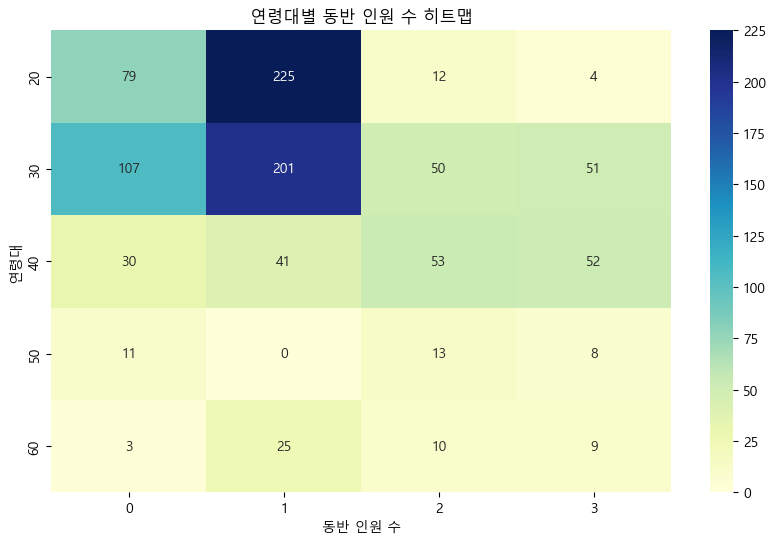

In [ ]:
# 동반 인원 수
companions_age = pd.crosstab(df["AGE_GRP"], df["TRAVEL_COMPANIONS_NUM"])
plt.figure(figsize=(10,6))
sns.heatmap(companions_age, cmap="YlGnBu", annot=True, fmt="d")
plt.title("연령대별 동반 인원 수 히트맵")
plt.xlabel("동반 인원 수")
plt.ylabel("연령대")
plt.show()

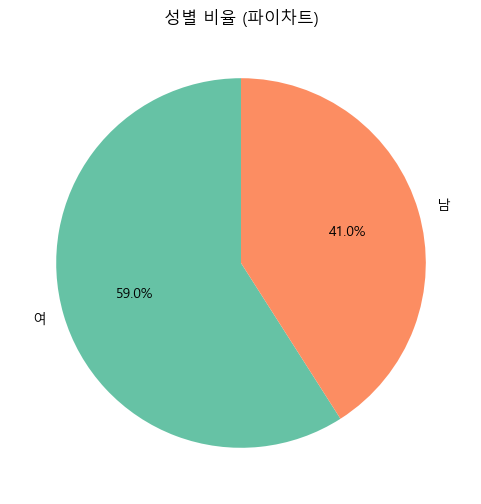

In [ ]:
# 성별 분포
gender_counts = df["GENDER"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%.1f%%", 
        startangle=90, colors=sns.color_palette("Set2"))
plt.title("성별 비율 (파이차트)")
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_3028\958763969.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["AGE_GRP"], shade=True, color="blue")


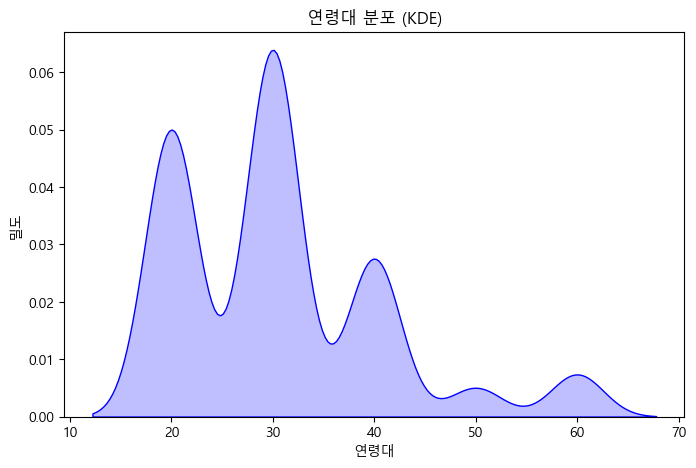

In [ ]:
# 연령대 분포
plt.figure(figsize=(8,5))
sns.kdeplot(df["AGE_GRP"], shade=True, color="blue")
plt.title("연령대 분포 (KDE)")
plt.xlabel("연령대")
plt.ylabel("밀도")
plt.show()